# Exercise 1 – Regression Task

# Smart Home Device Usage Prediction By Using Linear Regression.

In this exercise, the focus is on predicting smart home device usage using a linear regression model, which analyzes historical data on various device interactions and user behaviors. The model is to my aims to estimate the efficiency and usage patterns of smart home systems. This will help to understand trends and make data-driven recommendations for optimizing smart home goods to improve energy performance.

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 2. Loading The Dataset

In [2]:
data = pd.read_csv('/kaggle/input/smart-home-usage-dataset/smart_home_device_usage_data.csv')
print(data)
print("Dataset Loaded Successfully")

      UserID       DeviceType  UsageHoursPerDay  EnergyConsumption  \
0          1    Smart Speaker         15.307188           1.961607   
1          2           Camera         19.973343           8.610689   
2          3  Security System         18.911535           2.651777   
3          4           Camera          7.011127           2.341653   
4          5           Camera         22.610684           4.859069   
...      ...              ...               ...                ...   
5398    5399       Thermostat          4.556314           5.871764   
5399    5400           Lights          0.561856           1.555992   
5400    5401    Smart Speaker         11.096236           7.677779   
5401    5402  Security System          8.782169           7.467929   
5402    5403       Thermostat         13.540381           9.043076   

      UserPreferences  MalfunctionIncidents  DeviceAgeMonths  \
0                   1                     4               36   
1                   1          

# 3. Display All Basics Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [4]:
data.shape

(5403, 8)

In [5]:
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [6]:
data.tail()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1
5402,5403,Thermostat,13.540381,9.043076,0,0,30,0


In [7]:
data.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


# 4. Data Cleaning Or Preprocessing 

In [8]:
data = data.drop(["UserID", "DeviceType"], axis = 1)
data.head()

,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,15.307188,1.961607,1,4,36,1
1,19.973343,8.610689,1,0,29,1
2,18.911535,2.651777,1,0,20,1
3,7.011127,2.341653,0,3,15,0
4,22.610684,4.859069,1,3,36,1


# 5. Selecting Features & Target Variable

In [9]:
X = data.drop(["SmartHomeEfficiency"], axis=1)
Y = data["SmartHomeEfficiency"]

# 6. Split Train-Test Dataset

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

# 7. Model Training Linear Regression

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# 8. Prediction For Testing

In [12]:
Y_predict = model.predict(X_test)
Y_predict

array([ 0.43481051,  0.32025536,  0.2009422 , ..., -0.01152756,
        0.0779983 ,  0.63385578])

# 9. Model Evaluation Metrics
# This section calculates the Mean Absolute Error (MAE), Mean Squared Error (MSE) and R² Score to evaluate model performance.

In [13]:
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Model Performance:
Mean Absolute Error: 0.2726
Mean Squared Error: 0.1145
R2 Score: 0.5104


# Visualisations

# 1. Scatter Plot: Actual Vs Predicted

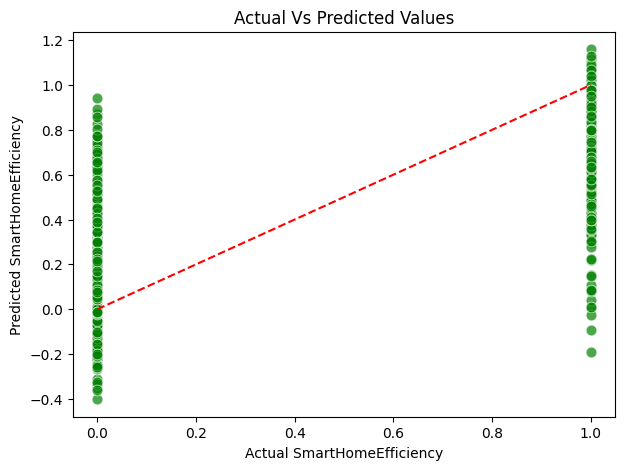

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=Y_test, y=Y_predict, color='green', s=60, alpha = 0.7)
plt.plot([Y_test.min(),Y_test.max()], [Y_test.min(),Y_test.max()], 'r--')
plt.xlabel("Actual SmartHomeEfficiency")
plt.ylabel("Predicted SmartHomeEfficiency")
plt.title("Actual Vs Predicted Values")
plt.show()

# 2. Error Distribution For Residuals Histogram

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


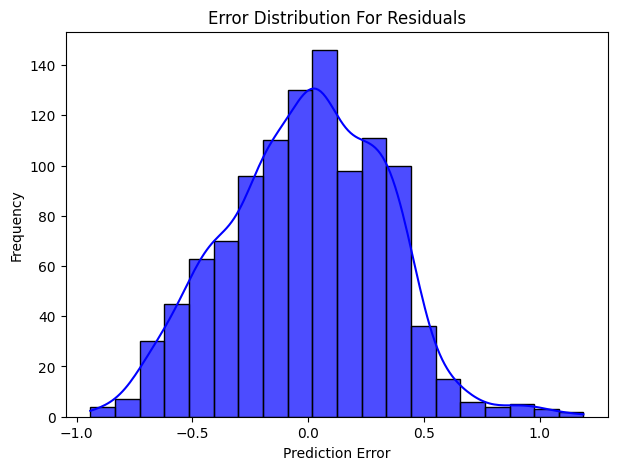

In [15]:
errors = Y_test - Y_predict
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=20, kde=True, color='blue', alpha = 0.7)
plt.title("Error Distribution For Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

# 3. Line Plot: Actual Vs Predicted Trend 
To Show First 50 Samples

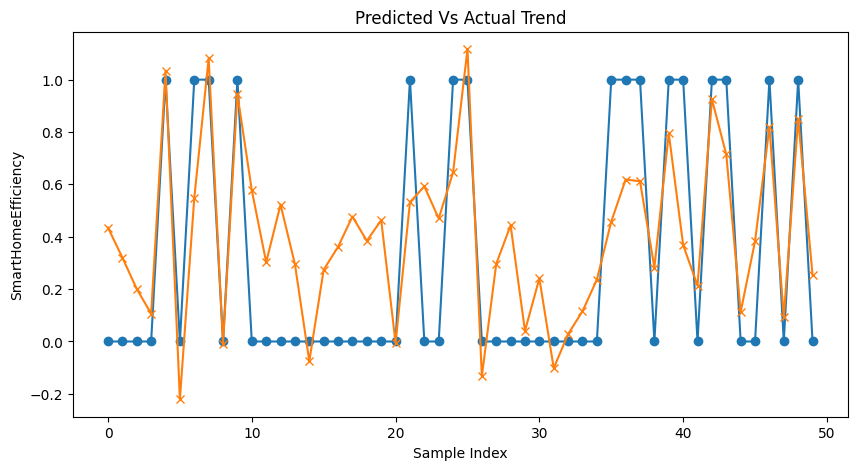

In [16]:
plt.figure(figsize=(10,5))
plt.plot(Y_test.values[:50], label="Actual", marker='o')
plt.plot(Y_predict[:50], label="Predicted", marker='x')
plt.title("Predicted Vs Actual Trend")
plt.xlabel('Sample Index')
plt.ylabel("SmartHomeEfficiency")
plt.legend
plt.show()

# 4. Histogram For All Numerical Columns

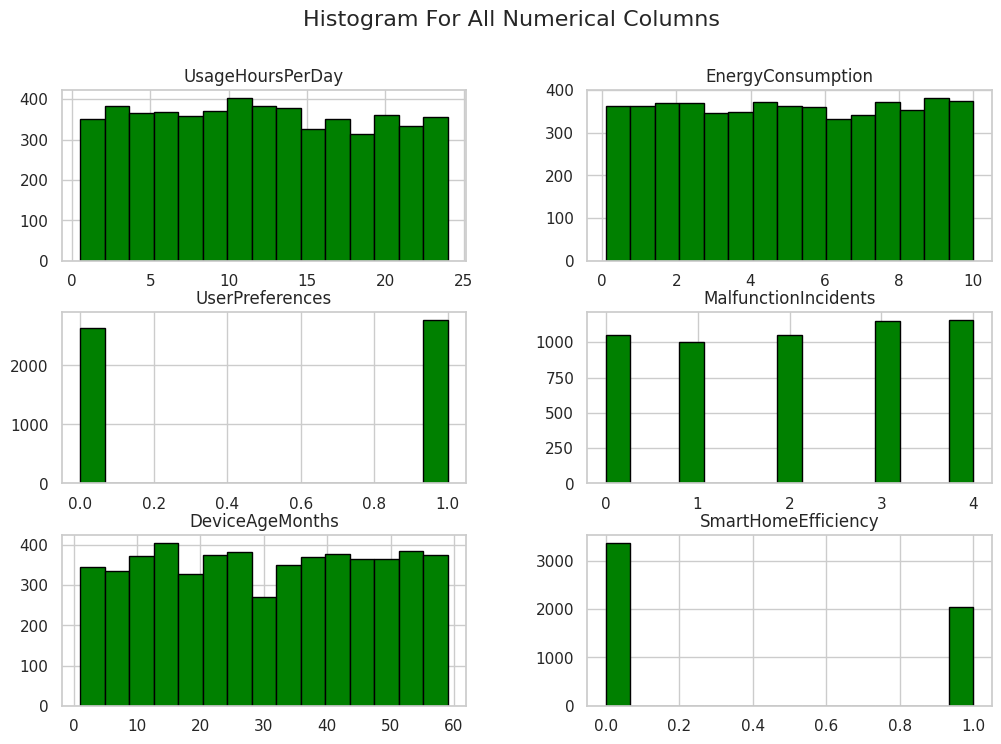

In [17]:
sns.set(style = "whitegrid")
data.hist(figsize = (12, 8), bins = 15, color = 'green', edgecolor = 'black')
plt.suptitle("Histogram For All Numerical Columns", fontsize = 16)
plt.show()